*Digit Recognizer* 🚦 🎱
=====

Reference
- Kaggle'PCA decomposition and Keras neural network' by PIOTR MILEWSKI : https://www.kaggle.com/code/pmmilewski/pca-decomposition-and-keras-neural-network

# PCA

In [1]:
# import libraries
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.cluster
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
# load data
X = pd.read_csv('input/train.csv')
y = X.iloc[:,0]

## Split Data

In [4]:
ratio = 25 # Split ratio(Test Sets Ratio)[%]
ratio = ratio/100

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ratio, shuffle=True, random_state=99)

In [6]:
print(y_train.value_counts().sort_index())
print(y_train.count())
train_No = y_train.count()
print(y_test.value_counts().sort_index())
print(y_test.count())
test_No = y_test.count()

0    3104
1    3498
2    3108
3    3230
4    3085
5    2871
6    3086
7    3326
8    3077
9    3115
Name: label, dtype: int64
31500
0    1028
1    1186
2    1069
3    1121
4     987
5     924
6    1051
7    1075
8     986
9    1073
Name: label, dtype: int64
10500


In [7]:
# Scaling
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_sc_train = scaler.transform(X_train)
X_sc_test = scaler.transform(X_test)

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

Wall time: 7.01 s


Text(0, 0.5, 'Cumulative explained variance')

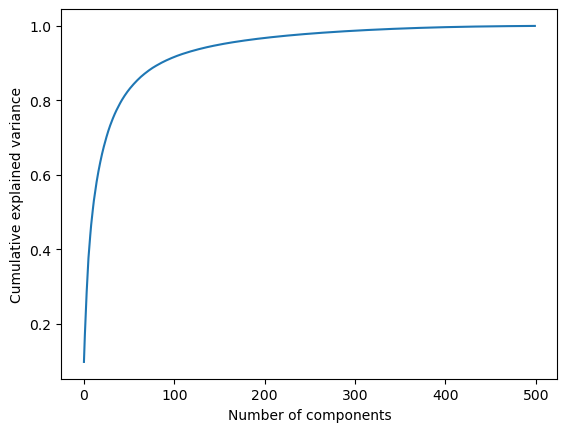

In [8]:
%%time
#for selecting number of components
pca = sklearn.decomposition.PCA(n_components=500)
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [14]:
%%time
NCOMPONENTS = 500

pca = sklearn.decomposition.PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)

Wall time: 7.09 s


In [11]:
inv_pca = pca.inverse_transform(X_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)

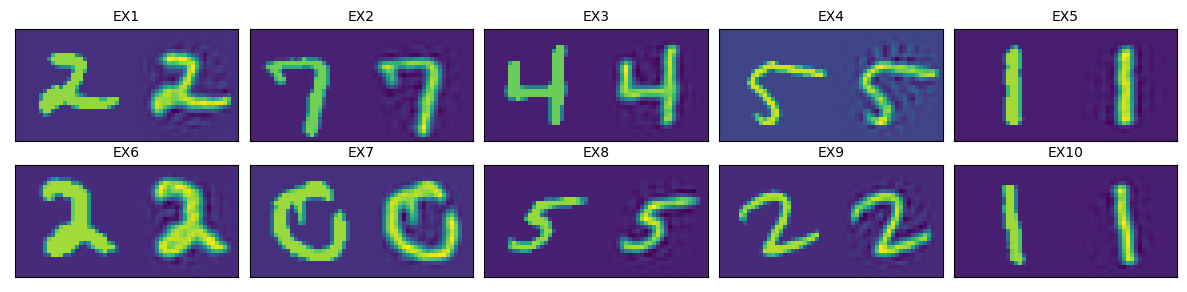

In [12]:
def side_by_side(indexes):
    org = np.array(X_train)[indexes,1:].reshape(28,28)
    rec = inv_sc[indexes,1:].reshape(28,28)
    pair = np.concatenate((org, rec), axis=1)
    return(pair)
    
f, ax_pca = plt.subplots(2, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.75, top=1)

for k, ax_pca in enumerate(np.ravel(ax_pca)):
    ax_pca.axes.get_xaxis().set_visible(False)
    ax_pca.axes.get_yaxis().set_visible(False)
    if k <= 10:
        ax_pca.set_title('EX{}'.format(k+1), fontsize=10)
        pca_plot = ax_pca.imshow(side_by_side(k))   

In [15]:
model = models.Sequential()
no_layers = 1
units = 128

model.add(layers.Dense(units, input_dim=NCOMPONENTS, activation='relu'))
model.add(layers.GaussianNoise(pca_std))
for i in range(no_layers):
    model.add(layers.Dense(units, activation='relu'))
    model.add(layers.GaussianNoise(pca_std))
    model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

model.fit(X_pca_train, Y_train, epochs=100, batch_size=256, validation_split=0.15, verbose=2)

test_loss, test_acc = model.evaluate(X_pca_test, Y_test, verbose=2)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

Epoch 1/100
105/105 - 1s - loss: 1.4347 - categorical_accuracy: 0.5820 - val_loss: 0.2926 - val_categorical_accuracy: 0.9111 - 1s/epoch - 11ms/step
Epoch 2/100
105/105 - 0s - loss: 0.4182 - categorical_accuracy: 0.8768 - val_loss: 0.1861 - val_categorical_accuracy: 0.9448 - 314ms/epoch - 3ms/step
Epoch 3/100
105/105 - 0s - loss: 0.2380 - categorical_accuracy: 0.9278 - val_loss: 0.1521 - val_categorical_accuracy: 0.9570 - 266ms/epoch - 3ms/step
Epoch 4/100
105/105 - 0s - loss: 0.1690 - categorical_accuracy: 0.9482 - val_loss: 0.1281 - val_categorical_accuracy: 0.9657 - 290ms/epoch - 3ms/step
Epoch 5/100
105/105 - 0s - loss: 0.1234 - categorical_accuracy: 0.9606 - val_loss: 0.1194 - val_categorical_accuracy: 0.9670 - 310ms/epoch - 3ms/step
Epoch 6/100
105/105 - 0s - loss: 0.0965 - categorical_accuracy: 0.9678 - val_loss: 0.0998 - val_categorical_accuracy: 0.9725 - 284ms/epoch - 3ms/step
Epoch 7/100
105/105 - 0s - loss: 0.0753 - categorical_accuracy: 0.9754 - val_loss: 0.0940 - val_catego